In [1]:
# import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
# load the cleaned Titanic datasetc
df = pd.read_csv("C:/Users/j/OneDrive/Desktop/Amalitech Graduate Trainee Program/Assignments/Titanic Project/Group2_Week1_Project/data/processed/Cleaned_Titanic_Dataset.csv")

# display first few rows of the dataset
df.head()

,S/N,pclass,survived,sex,age,fare,embarked
0,0,1,1,female,29,211,S
1,1,1,1,male,1,152,S
2,2,1,0,female,2,152,S
3,3,1,0,male,30,152,S
4,4,1,0,female,25,152,S


In [5]:
# Check missing values
df.isnull().sum()

S/N         0
pclass      0
survived    0
sex         0
age         0
fare        0
embarked    0
dtype: int64

In [6]:
# Display structure of the dataset
print(df.info())

# Generate summary statistics for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   S/N       1092 non-null   int64 
 1   pclass    1092 non-null   int64 
 2   survived  1092 non-null   int64 
 3   sex       1092 non-null   object
 4   age       1092 non-null   int64 
 5   fare      1092 non-null   int64 
 6   embarked  1092 non-null   object
dtypes: int64(5), object(2)
memory usage: 59.8+ KB
None
               S/N       pclass     survived          age         fare
count  1092.000000  1092.000000  1092.000000  1092.000000  1092.000000
mean    604.701465     2.213370     0.422161    29.966117    36.812271
std     370.674242     0.860203     0.494130    13.985777    55.456629
min       0.000000     1.000000     0.000000     1.000000     0.000000
25%     280.750000     1.000000     0.000000    22.000000     8.000000
50%     598.500000     2.000000     0.000000    28.000000    16.000000

In [7]:
# Select relevant numerical features for summary statistics
numerical_cols = ['age', 'fare', 'survived']

# Generate and display descriptive statistics for the selected numerical columns
summary_stats = df[numerical_cols].describe()
print(summary_stats)

               age         fare     survived
count  1092.000000  1092.000000  1092.000000
mean     29.966117    36.812271     0.422161
std      13.985777    55.456629     0.494130
min       1.000000     0.000000     0.000000
25%      22.000000     8.000000     0.000000
50%      28.000000    16.000000     0.000000
75%      39.000000    36.250000     1.000000
max      80.000000   512.000000     1.000000


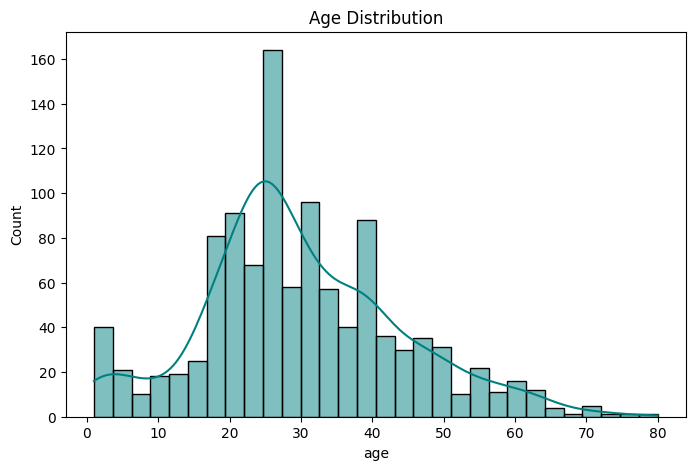

In [8]:
# Plotting the distribution of 'Age'
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='teal')
plt.title("Age Distribution")
plt.show()

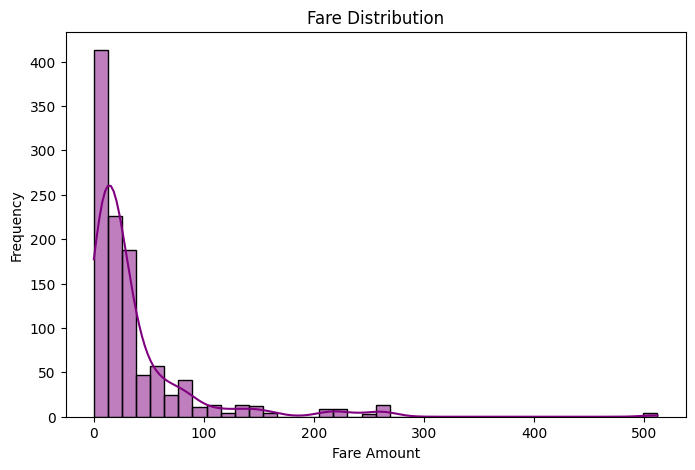

In [9]:
# Plotting the distribution of 'Fare' 
plt.figure(figsize=(8,5))
sns.histplot(df['fare'], bins=40, kde=True, color='purple')
plt.title("Fare Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

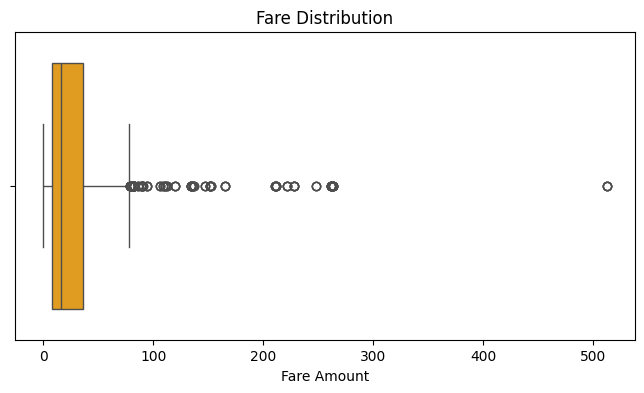

In [12]:
# Box plot to visualize fare distribution and spot outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare'], color='orange')

# Add title and label for clarity
plt.title("Fare Distribution")
plt.xlabel("Fare Amount")
plt.show()

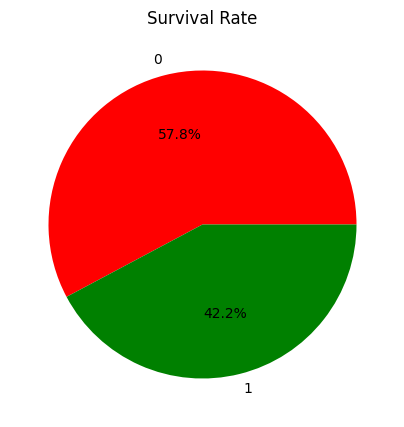

In [13]:
# Plotting the proportion of survivors and non-survivors using a pie chart
plt.figure(figsize=(5,5))
df['survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=["red", "green"])
plt.title("Survival Rate")
plt.ylabel("")  
plt.show()

C:\Users\j\AppData\Local\Temp\ipykernel_23156\4121316481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=df, palette='Oranges')


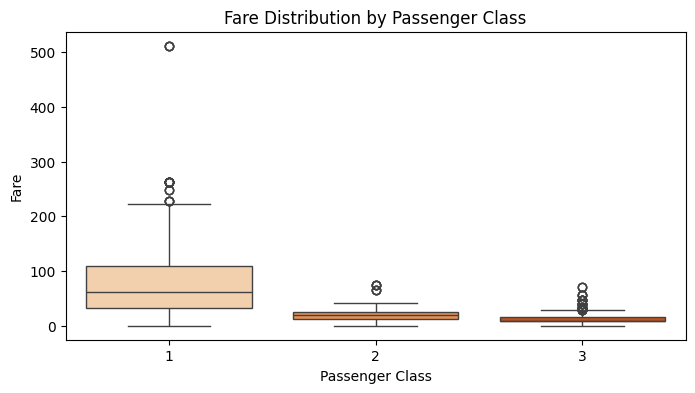

In [14]:
plt.figure(figsize=(8, 4))

# Visualize how fare varies with socio-economic class
sns.boxplot(x='pclass', y='fare', data=df, palette='Oranges')

# Add title and axis labels
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class") 
plt.ylabel("Fare")

# Show the plot
plt.show()

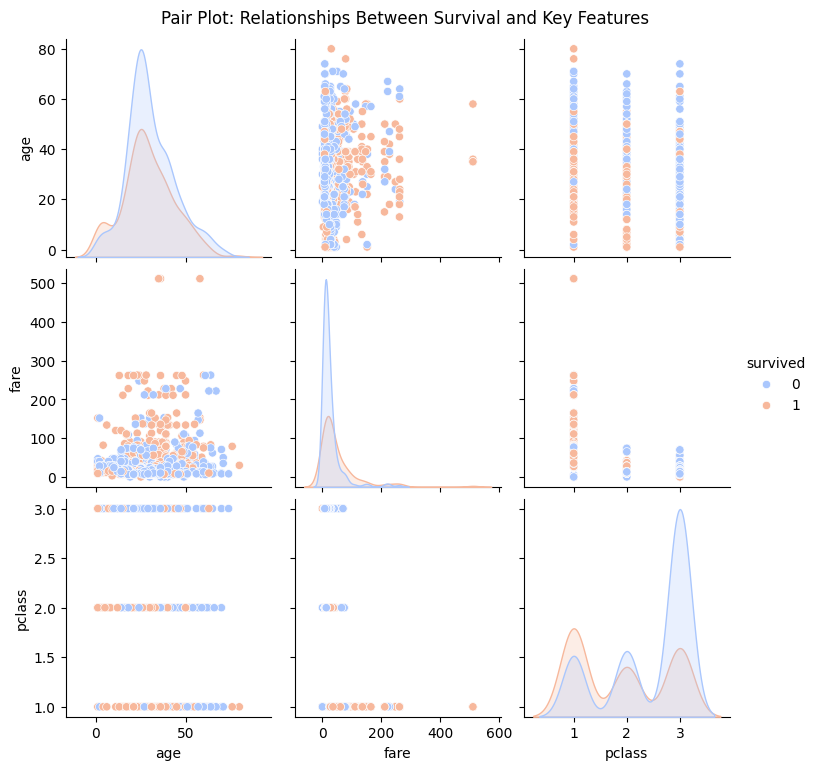

In [16]:
# Pair plot to explore relationships between survival and key features 
sns.pairplot(df, hue='survived', vars=['age', 'fare', 'pclass'], palette='coolwarm')

plt.suptitle("Pair Plot: Relationships Between Survival and Key Features", y=1.02)
plt.show()

C:\Users\j\AppData\Local\Temp\ipykernel_23156\406161306.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None, palette="pastel", order=[1, 2, 3])
C:\Users\j\AppData\Local\Temp\ipykernel_23156\406161306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None, palette="pastel", order=[1, 2, 3])


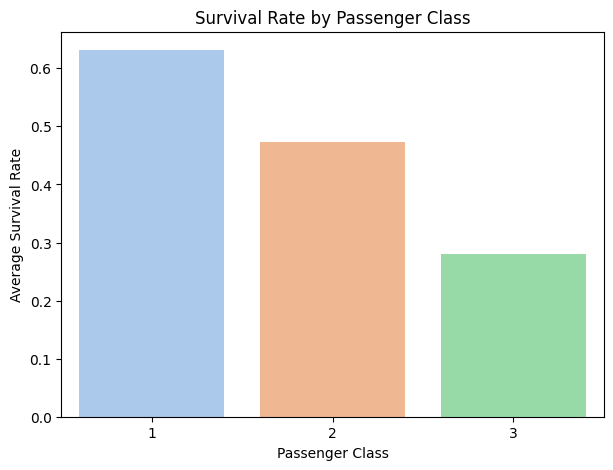

In [17]:
# Plotting survival distribution by passenger class 
plt.figure(figsize=(7, 5))
sns.barplot(x='pclass', y='survived', data=df, ci=None, palette="pastel", order=[1, 2, 3])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Survival Rate")
plt.show()

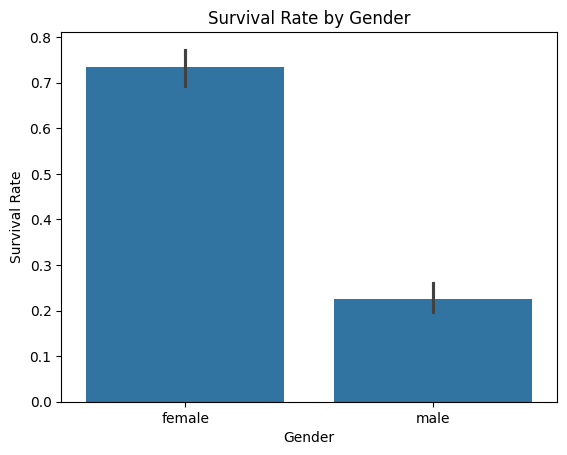

In [18]:
# Plotting survival distribution by sex
sns.barplot(x='sex', y='survived', data=df)

# Adding title and labels
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

# Show the plot
plt.show()

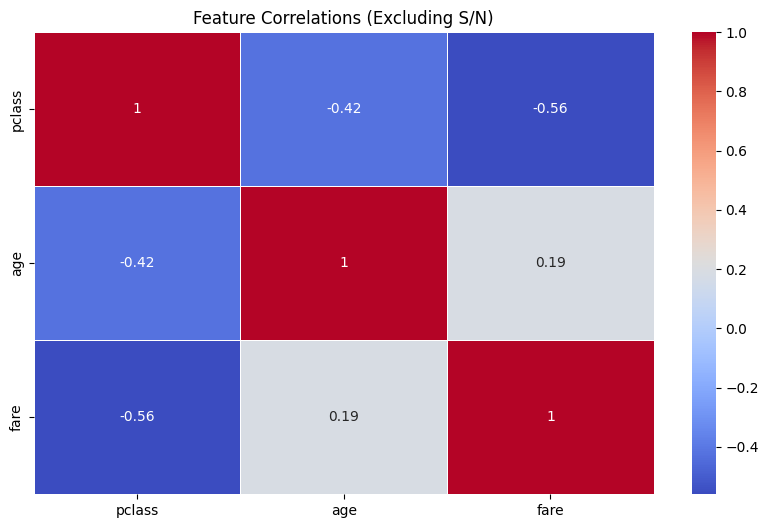

In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Drop 'S/N' if it exists
if 'S/N' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['S/N'])

# Calculate and plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlations (Excluding S/N)")
plt.show()